# K Nearest Neighbors with Python
You've been given a classified data set from a company! They've hidden the feature column names but have given you the data and the target classes.

We'll try to use KNN to create a model that directly predicts a class for a new data point based off of the features.

Let's grab it and use it!

# Import Libraries

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Import data

In [4]:
df = pd.read_csv("Classified Data")
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


# EDA

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1000 non-null   int64  
 1   WTT           1000 non-null   float64
 2   PTI           1000 non-null   float64
 3   EQW           1000 non-null   float64
 4   SBI           1000 non-null   float64
 5   LQE           1000 non-null   float64
 6   QWG           1000 non-null   float64
 7   FDJ           1000 non-null   float64
 8   PJF           1000 non-null   float64
 9   HQE           1000 non-null   float64
 10  NXJ           1000 non-null   float64
 11  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(2)
memory usage: 93.9 KB


In [10]:
df.describe()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,499.500000,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,288.819436,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.000000,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,249.750000,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,499.500000,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,749.250000,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,999.000000,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


<AxesSubplot:>

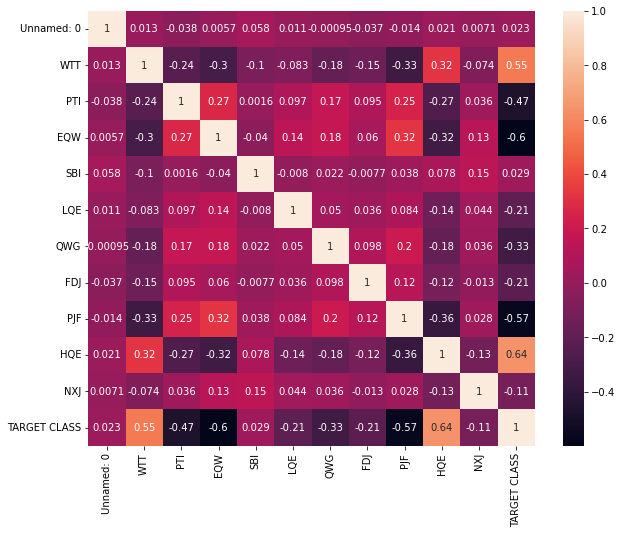

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:>

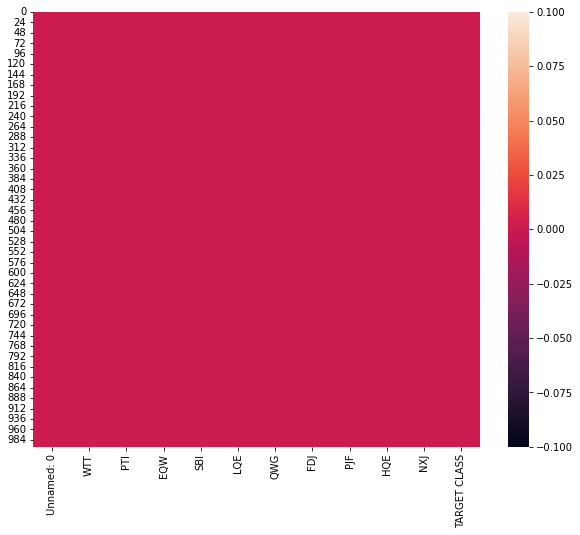

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())

# Impressions

1. Data is pretty flat, meaning all are clean and no null values found
2. Unnamed row is not needed
3. Target column is that of a Classification stating 0 or 1
4. We can get directly into the KNN algorithm part.
5. Will do a pairplot as well for viewing more relation-ships.



In [15]:
df.drop("Unnamed: 0", axis=1)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


<AxesSubplot:>

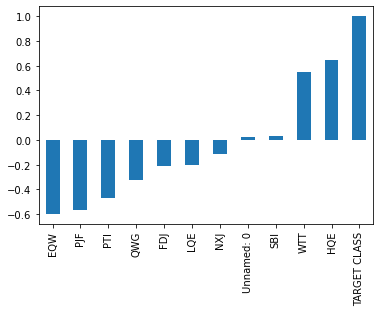

In [30]:
df.corrwith(df["TARGET CLASS"]).sort_values().plot(kind='bar')

# Build the model

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [32]:
from sklearn.model_selection import train_test_split

In [35]:
from sklearn.preprocessing import StandardScaler

In [42]:
X = df.drop(['TARGET CLASS', 'Unnamed: 0'], axis=1)

In [43]:
y = df['TARGET CLASS']

In [44]:
scaler = StandardScaler()

In [45]:
scaler.fit(X)

StandardScaler()

In [46]:
scaled_data = scaler.transform(X)

In [49]:
scaled_data_df = pd.DataFrame(scaled_data, columns=X.columns)

In [48]:
 X.columns

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ'], dtype='object')

In [50]:
scaled_data_df

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
...,...,...,...,...,...,...,...,...,...,...
995,0.211653,-0.312490,0.065163,-0.259834,0.017567,-1.395721,-0.849486,-2.604264,-0.139347,-0.069602
996,-1.292453,-0.616901,0.369613,0.482648,1.569891,1.273495,0.362784,-1.242110,-0.679746,1.473448
997,0.641777,-0.513083,-0.179205,1.022255,-0.539703,-0.229680,-2.261339,-2.362494,-0.814261,0.111597
998,0.467072,-0.982786,-1.465194,-0.071465,2.368666,0.001269,-0.422041,-0.036777,0.406025,-0.855670


In [51]:
knn = KNeighborsClassifier(n_neighbors=1)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [53]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [54]:
y_pred = knn.predict(X_test)

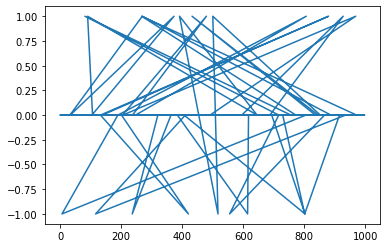

In [64]:
plt.plot(y_test-y_pred)

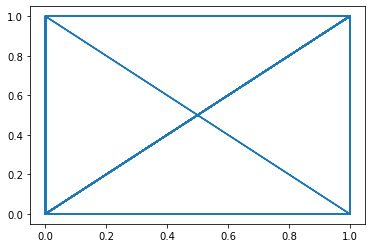

In [75]:
plt.plot(y_test, y_pred)

In [ ]:
# sns.scatterplot(x=y_test, hue=y_pred, data=df)

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       159
           1       0.93      0.91      0.92       141

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [66]:
from sklearn.metrics import confusion_matrix

In [68]:
confusion_matrix(y_test, y_pred)

array([[150,   9],
       [ 13, 128]], dtype=int64)

# Explore other K values for better results

Now let's see if we can get a better score than this. The current one at K=1 is pretty good. But can we get better value if we choose any other value for K

In [83]:
# We will compute error rate here. Meaning, we will take the MEAN of all the values where the Predicted value was not equal
# to the y_test val. This will be done for all the K values from 1 to 40

error_rate = []

for k in range(1, 41):
    print(">>> Checking with K val as {}".format(k))
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rate.append(np.mean(y_pred != y_test))
    

>>> Checking with K val as 1
>>> Checking with K val as 2
>>> Checking with K val as 3
>>> Checking with K val as 4
>>> Checking with K val as 5
>>> Checking with K val as 6
>>> Checking with K val as 7
>>> Checking with K val as 8
>>> Checking with K val as 9
>>> Checking with K val as 10
>>> Checking with K val as 11
>>> Checking with K val as 12
>>> Checking with K val as 13
>>> Checking with K val as 14
>>> Checking with K val as 15
>>> Checking with K val as 16
>>> Checking with K val as 17
>>> Checking with K val as 18
>>> Checking with K val as 19
>>> Checking with K val as 20
>>> Checking with K val as 21
>>> Checking with K val as 22
>>> Checking with K val as 23
>>> Checking with K val as 24
>>> Checking with K val as 25
>>> Checking with K val as 26
>>> Checking with K val as 27
>>> Checking with K val as 28
>>> Checking with K val as 29
>>> Checking with K val as 30
>>> Checking with K val as 31
>>> Checking with K val as 32
>>> Checking with K val as 33
>>> Checking with K

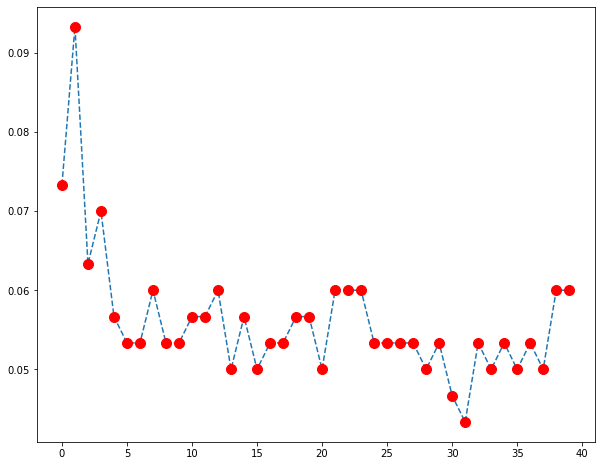

In [93]:
plt.figure(figsize=(10, 8))
plt.plot(error_rate, linestyle="--", markeredgecolor='red', marker='o', markersize=10, markerfacecolor='red')

# Impressions

We can see that at around K = 13 or 15, the error rate comes down to 0.05. We also see that once we keep going further up with the K value, at around k = 31, error rate gets pretty low. But I will not choose that as once we increase the rate, we see some quick jump off to higher error rate. But as it goes, you can always try with those values and figure out, what works the best for you.

So for this notebook, let's basically see what accuracies we get from K = 15

In [94]:
knn = KNeighborsClassifier(n_neighbors=15)

In [95]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [96]:
y_pred = knn.predict(X_test)

In [97]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       159
           1       0.94      0.94      0.94       141

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [ ]:
# As you can see, we did marginally better with k = 15. This tempts me to try with K = 31. So here we go.

In [98]:
knn = KNeighborsClassifier(n_neighbors=31)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       159
           1       0.95      0.95      0.95       141

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



I feel alughing out loud. Actually I did while tying this. We see much better accuracy here with K = 31. But as stands
the truth, its all a matter of trail. Choose what works the best for you.


# Kudos and Enjoy !